In [2]:
from numpy_model import *
from scipy.optimize import minimize
import numdifftools as nd

In [10]:
basedir = common.getBaseDirectory()
common.symlink(basedir+"data/templatesCounting",basedir+"data/templates")

X = np.load(basedir + "data/templates/templatesX_{}.npy".format('')) 
Y = np.load(basedir + "data/templates/templatesY_{}.npy".format('')) 
#Y = np.sum(X,axis=1)

# define Model

In [11]:
model = PredictiveModel_np(X)

In [12]:
def loss (param):
    y, regu = model.predict(param)
    loss  = np.sum( (y-Y)**2/(2*Y+0.1) )
    loss += regu
    return loss

param0 = np.array([0.107,0.108,0.1091] + [1.0,1.1] +[1.0]*12 + [0.]*7)
result = minimize( loss, param0, method='SLSQP', bounds = [(0,1)]*3 + [(0,2)]*14  + [(-1,1)]*7 )

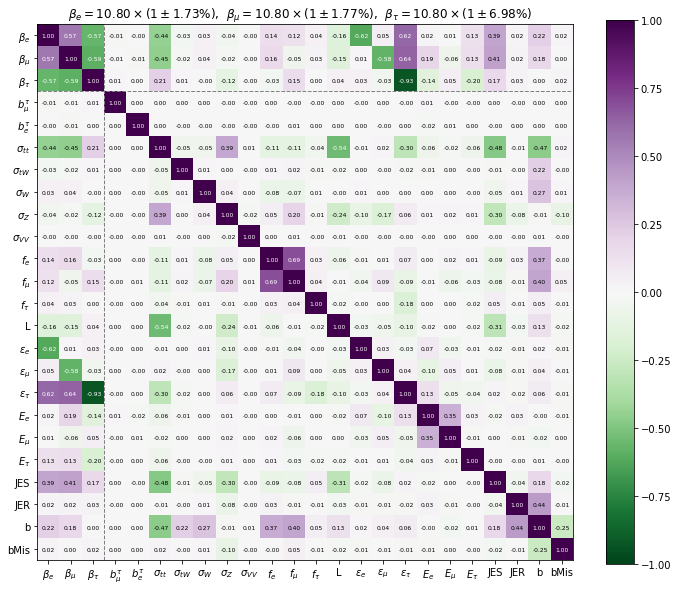

In [13]:
hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
hessinv = np.linalg.inv(hess)
sigma   = np.sqrt(hessinv.diagonal())
corr  = hessinv/np.outer(sigma, sigma)

commonp.showParameterCovMat(corr,sigma)

In [14]:
print(sigma[0:3]/0.1080*100)
print(sigma[3:])

[1.7321511  1.77149002 6.97899264]
[0.00199988 0.00199968 0.02985503 0.0498652  0.04869835 0.0358073
 0.09997846 0.20124929 0.14444176 0.23623686 0.02218677 0.00976921
 0.00960036 0.04358296 0.68174468 0.94783055 0.99672454 0.83556198
 0.98620058 0.08484466 0.99169301]


(0, 15)

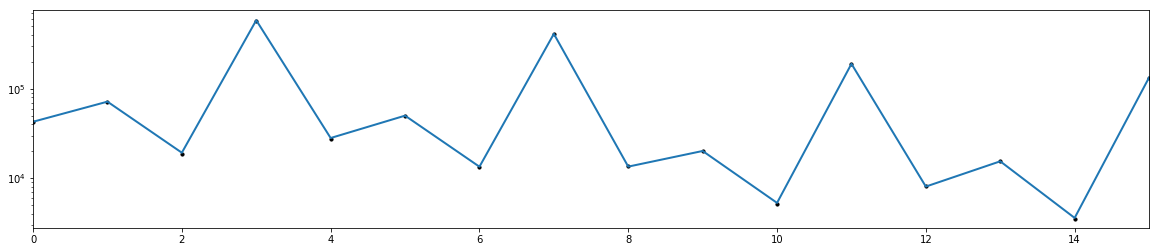

In [18]:
#temp = np.transpose(X,(0,1,2))
temp = np.concatenate(X,axis=1)
temp = np.sum(temp,axis=0)

targ = np.concatenate(Y,axis=0)

plt.figure(figsize=(20,4),facecolor='w')
c = np.arange(temp.size)
plt.plot(c, temp, lw=2)
plt.scatter(c, targ, c='k',s=10)
plt.yscale('log')
plt.xlim(c.min(),c.max())